# includes

In [2]:
from data_proc import get_historic_data, get_all_historic_data, read_data_tail
from capture_plot import plt_capture_onclick

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook



In [ ]:
print(plt_filename)

# simple flow

## configure data input

In [3]:
#check this:
# TOTAL_CANDLES = 120
# SYMBOL = 'BTCUSDT'
# INTERVAL ='15m'

TOTAL_CANDLES = 100
SYMBOL = 'SOLUSDT'
INTERVAL ='1h'

path = '.\\.data\\ntb\\'

current_datetime = datetime.today()
current_date = current_datetime.date()  # Extract date from datetime
current_date_0h = current_datetime.replace(hour=0, minute=0, second=0, microsecond=0)

#get 14 days back from today
MAX_DAYS_TO_GET_BACK = 14
current_date_0h -= timedelta(days=MAX_DAYS_TO_GET_BACK)

# getting the timestamp for binance format
# current_date_0h= datetime.fromisoformat('2023-12-06 00:00:00')
t_start = int(datetime.timestamp(current_date_0h)*1000)

tc= '-'
filename = SYMBOL+tc+INTERVAL+current_date.strftime('-%Y-%m-%d-')+str(TOTAL_CANDLES)+'.csv'

if not os.path.exists(path+filename):
    # valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
    pair_df= get_historic_data(symbol=SYMBOL, timestamp=t_start, interval=INTERVAL, filename=path+filename)
    print(pair_df.shape) 
    
    #pair_df = get_all_historic_data(symbol=SYMBOL, interval=INTERVAL, filename=path+filename, key=bnc_key, secret=bnc_sec)
    pair_df = pair_df[-TOTAL_CANDLES:] #get only latest TOTAL_CANDLES entries
    print(pair_df.shape)
else:
    pair_df = read_data_tail(path+filename, TOTAL_CANDLES) #get only latest TOTAL_CANDLES entries


(358, 5)
(100, 5)


In [4]:
print(pair_df)

                      open   high    low  close     volume
date                                                      
2023-12-04 16:00:00  60.53  61.05  60.32  60.92  299190.11
2023-12-04 17:00:00  60.93  61.31  60.60  60.81  148087.69
2023-12-04 18:00:00  60.82  60.85  60.34  60.41  209540.99
2023-12-04 19:00:00  60.40  61.04  60.32  61.04  211039.06
2023-12-04 20:00:00  61.03  61.81  61.00  61.65  230850.50
...                    ...    ...    ...    ...        ...
2023-12-08 15:00:00  72.89  73.28  71.70  72.02  477010.90
2023-12-08 16:00:00  72.02  73.35  72.02  72.88  374694.18
2023-12-08 17:00:00  72.88  74.08  72.52  73.62  370524.41
2023-12-08 18:00:00  73.63  73.77  72.04  72.80  516232.92
2023-12-08 19:00:00  72.79  73.02  72.00  72.19  168518.07

[100 rows x 5 columns]


## aquire selections

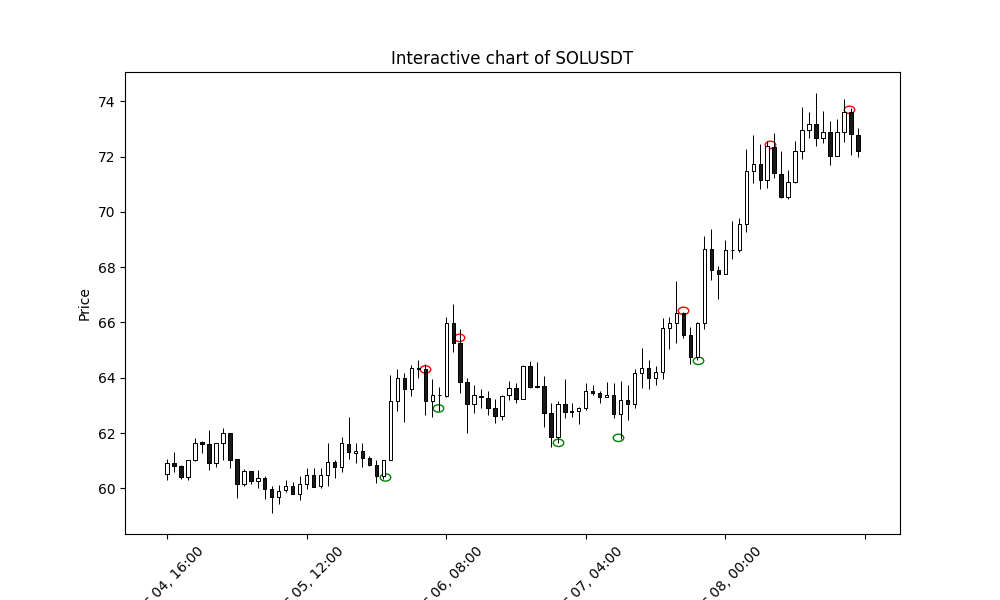

In [5]:
plt_filename = path+'m_'+ filename

# Load points from file and continue editing/start anew
plotter = plt_capture_onclick(pair_df, load_filename=plt_filename, pair_name = SYMBOL)

## store selections

In [6]:
# Save points to file
plotter.save_to_file()

## debug print from chart, on mouse click 

In [9]:
print(plotter.captured_output)

Coords: (21.12136258064516, 73.16225712839763) Candle clicked at 0.0002444602199074074
